# NumPy exercises

Some  of these come from / are inspired from https://github.com/rougier/numpy-100 and http://www.scipy-lectures.org/intro/numpy/exercises.html

You might want to look over these lists as well.

In [1]:
import numpy as np
from __future__ import print_function

---
## Q1

We can use `np.random.random_sample()` to create an array with random values.  By default, these will be in the range `[0.0, 1.0)`.  You can
multiple the output and add a scalar to it to get it to be in a different range.

Create a 10 x 10 array initialized with random numbers that lie between 0 and 10.

Then compute the average of the array (there is a numpy function for this, `np.mean()`).

---
#### My solution:

First, check documentation of `np.random.random_sample()`:

In [2]:
help(np.random.random_sample)

Help on built-in function random_sample:

random_sample(...)
    random_sample(size=None)
    
    Return random floats in the half-open interval [0.0, 1.0).
    
    Results are from the "continuous uniform" distribution over the
    stated interval.  To sample :math:`Unif[a, b), b > a` multiply
    the output of `random_sample` by `(b-a)` and add `a`::
    
      (b - a) * random_sample() + a
    
    Parameters
    ----------
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    
    Returns
    -------
    out : float or ndarray of floats
        Array of random floats of shape `size` (unless ``size=None``, in which
        case a single float is returned).
    
    Examples
    --------
    >>> np.random.random_sample()
    0.47108547995356098
    >>> type(np.random.random_sample())
    <type 'float'>
    >>> n

So we just need to pass in the size of the resulting array as an argument, and then scale it:

In [89]:
x = np.random.random_sample((10,10)) * 10.
print("x =\n", x)
print("min, max values = ", np.min(x), np.max(x))
print("mean value = ", np.mean(x))

x =
 [[ 8.28711961  8.18618302  8.32909533  4.73129993  2.79250321  1.50537134
   8.6188975   4.26283084  2.85647511  3.56645787]
 [ 1.92274321  4.4761153   2.98136358  2.72370739  7.88456272  9.53192349
   2.59397028  3.47063868  7.48503023  5.75899617]
 [ 4.5811376   7.68706649  9.93595994  1.75737489  6.06777838  4.58675095
   4.79417877  8.76531115  0.41586267  7.10052893]
 [ 1.06961545  9.49879546  9.22086643  7.72190288  7.69157744  8.49946994
   8.44317441  7.29519765  0.84669883  0.99664641]
 [ 3.67162386  3.21450756  9.86901454  8.7200567   3.90065586  1.54343903
   2.46233322  0.91747703  5.79531976  3.99983682]
 [ 9.13413412  9.73065121  5.36430881  2.79800893  2.31068223  2.26013237
   7.76096801  6.23909112  5.31854743  1.9085594 ]
 [ 5.03557551  3.26897934  1.90540209  9.96986129  4.49976485  2.0580825
   2.92395038  2.91222836  8.38343521  3.16710838]
 [ 2.16368255  9.05339592  8.82651053  3.61695752  2.11162472  2.31043686
   3.89241023  7.72946121  2.70818758  0.496899

---
## Q2

Create the array: 
```
[[1,  6, 11],
 [2,  7, 12],
 [3,  8, 13],
 [4,  9, 14],
 [5, 10, 15]]
```
with out explicitly typing it in.

Now create a new array containing only its 2nd and 4th rows.

---
#### My solution:

In [90]:
a = np.arange(1,16).reshape(3,5)
b = a.transpose()  # the array we were asked to make

In [91]:
a

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

In [92]:
b

array([[ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14],
       [ 5, 10, 15]])

Create a new array to hold the values we want, and fill them in:

In [93]:
c = np.zeros((2,3), dtype=int) # create empty array with 2 rows and 3 columns
c[0,:] = b[1,:].copy() # copy 2nd row
c[1,:] = b[3,:].copy() # copy 4th row
c

array([[ 2,  7, 12],
       [ 4,  9, 14]])

---
## Q3

Create a 2d array with `1` on the border and `0` on the inside, e.g., like:
```
1 1 1 1 1
1 0 0 0 1
1 0 0 0 1
1 1 1 1 1
```

Do this using array slice notation to let it work for an arbitrary-sized array

---

#### My solution:

In [94]:
# define size of new array
nrows = 5
ncols = 5

# create an array of that size filled with zeros
x = np.zeros((nrows, ncols), dtype=int) 

# fill in the edges with ones
x[0,:]  = 1
x[-1,:] = 1
x[:,0]  = 1
x[:,-1] = 1

# print it out
x

array([[1, 1, 1, 1, 1],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1],
       [1, 1, 1, 1, 1]])

---
## Q4

  * Create an array with angles in degrees 0, 15, 30, ... 90 (i.e., every 15 degrees up to 90).

  * Now create 3 new arrays with the sine, cosine, and tangent of the elements of the first array
  
  * Finally, calculate the inverse sine, inverse cosine, and inverse tangent the arrays above and compare to the original angles
  
---
#### My solution:

In [97]:
# create the array of angles 
angles = np.arange(0., 105., 15.) # need to use stop = 90 + 15 in np.arange()
print("angles =", angles)

# convert angles to radians
angles = np.radians(angles)

# trig functions
sine = np.sin(angles)
cosine = np.cos(angles)
tangent = np.tan(angles)

# inverse trig functions
arcsine = np.arcsin(sine)
arccosine = np.arccos(cosine)
arctangent = np.arctan(tangent)

# print each out, in degrees
print("sin(arcsin(angles)):", np.degrees(arcsine))
print("cos(arccos(angles)):", np.degrees(arccosine))
print("tan(arctan(angles)):", np.degrees(arctangent))

angles = [  0.  15.  30.  45.  60.  75.  90.]
sin(arcsin(angles)): [  0.  15.  30.  45.  60.  75.  90.]
cos(arccos(angles)): [  0.  15.  30.  45.  60.  75.  90.]
tan(arctan(angles)): [  0.  15.  30.  45.  60.  75.  90.]


---
## Q5

Given the array:
```
x = np.array([1, -1, 2, 5, 8, 4, 10, 12, 3])
```
calculate the difference of each element with its neighbor.

---
#### My solution:

We will calculate the difference $x_{i+1} - x_i$ for each element $x_i$ in the array, $i = 0, ..., N-1$ where $N$ is the number of  elements in the array.

This could be done with a loop, which is what we would need to do if `x` were a list:

    N = len(x)
    for i in range(N-1):
        difference = x[i+1] - x[i]
        
But here `x` is an array, so we can take advantage of the whole-array operations:

- Use two "new" arrays, each of length $N-1$: 

    - The first will have elements $x_j = x_i$ for $j = 0, ..., N-1$ and $i = 0, ..., N-1$ 
    
        - It can be created by slicing `x` to include all but the last element, `x[:-1]`
    
    - The second will have the elements $x_k = x_{i+1}$ for $k = 0, ..., N-1$ and $i = 0, ..., N-1$ 
        
        - It can be created by slicing `x` to include all but the first element, `x[1:]` 
    
- Then we simply need to subtract the two.

In [99]:
x = np.array([1, -1, 2, 5, 8, 4, 10, 12, 3])
x

array([ 1, -1,  2,  5,  8,  4, 10, 12,  3])

In [100]:
difference = x[1:] - x[:-1]
difference

array([-2,  3,  3,  3, -4,  6,  2, -9])

---
## Q6

Here we will read in columns of numbers from a file and create a histogram, using NumPy routines.  Make sure you have the data file
"`sample.txt`" in the same directory as this notebook (you can download it from  https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-3/sample.txt

  * Use `np.loadtxt()` to read this file in.  

  * Next, use `np.histogram()` to create a histogram array.  The output returns both the count and an array of edges.
  
  * Finally, loop over the bins and print out the bin center (averaging the left and right edges of the bin) and the count for that bin.
  
---
#### My solution:

In [101]:
# load the file; for me it's in a different directory
fname = "python-class/lectures/02-numpy/sample.txt"
sample = np.loadtxt(fname)
# look at it
sample

array([[  0.00000000e+00,  -4.75677275e+00],
       [  1.00000000e+00,   6.88953354e+00],
       [  2.00000000e+00,   8.99689609e+00],
       [  3.00000000e+00,  -1.74610171e+00],
       [  4.00000000e+00,   1.03044029e+00],
       [  5.00000000e+00,   4.63576843e+00],
       [  6.00000000e+00,   5.17722592e+00],
       [  7.00000000e+00,   1.59646902e+01],
       [  8.00000000e+00,  -1.20210982e+01],
       [  9.00000000e+00,  -1.81008788e+01],
       [  1.00000000e+01,  -2.51788866e+01],
       [  1.10000000e+01,   4.51892535e+00],
       [  1.20000000e+01,   9.04391677e+00],
       [  1.30000000e+01,  -5.22153591e-01],
       [  1.40000000e+01,  -3.13388866e+00],
       [  1.50000000e+01,  -6.91471494e+00],
       [  1.60000000e+01,  -6.31426355e+00],
       [  1.70000000e+01,   6.70690189e+00],
       [  1.80000000e+01,  -2.59716364e+01],
       [  1.90000000e+01,  -4.43537243e+00],
       [  2.00000000e+01,   4.88905016e-01],
       [  2.10000000e+01,  -3.60048108e-02],
       [  

In [102]:
# separate columns into two arrays
indices = sample[:,0]
data = sample[:,1]

# print out some info about that data - will give an idea if doing the rest properly
print("min of data = {:5.2f}".format(np.min(data)))
print("max of data = {:5.2f}".format(np.min(data)))
print("mean of data = {:5.2f}".format(np.mean(data)))
print("standard deviation of data = {:5.2f}".format(np.std(data)))

min of data = -30.59
max of data = -30.59
mean of data =  1.19
standard deviation of data = 11.89


In [103]:
# make a histogram of data: get the frequency per bin and bin edges
hist, edges = np.histogram(data)

In [104]:
# print out some info
print("hist values = \n",hist)
print("bin edges = \n", edges)
print("length of hist, edges = ",len(hist), len(edges))

hist values = 
 [ 3  4  9 22 22 22  9  7  1  1]
bin edges = 
 [-30.58842789 -23.67009726 -16.75176662  -9.83343599  -2.91510536
   4.00322527  10.9215559   17.83988653  24.75821717  31.6765478
  38.59487843]
length of hist, edges =  10 11


In [106]:
# print out bin center and value for each bin
nbins = len(hist)
header = "lower edge | center | upper edge | frequency"
print(header)
print("-"*len(header))
template = "{:10.2f} | {:6.2f} | {:10.2f} | {:6.2f}"
for i in range(nbins):
    bin_center = (edges[i] + edges[i+1]) / 2.
    print(template.format(edges[i], bin_center, edges[i+1], hist[i]))

lower edge | center | upper edge | frequency
--------------------------------------------
    -30.59 | -27.13 |     -23.67 |   3.00
    -23.67 | -20.21 |     -16.75 |   4.00
    -16.75 | -13.29 |      -9.83 |   9.00
     -9.83 |  -6.37 |      -2.92 |  22.00
     -2.92 |   0.54 |       4.00 |  22.00
      4.00 |   7.46 |      10.92 |  22.00
     10.92 |  14.38 |      17.84 |   9.00
     17.84 |  21.30 |      24.76 |   7.00
     24.76 |  28.22 |      31.68 |   1.00
     31.68 |  35.14 |      38.59 |   1.00


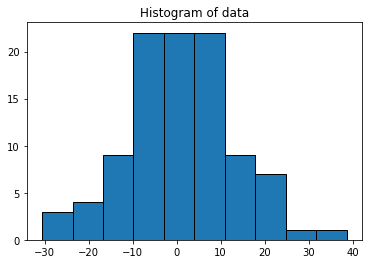

In [107]:
# plot the histogram
import matplotlib.pyplot as plt
plt.figure()
plt.hist(data, bins=edges, edgecolor='black')  
plt.title("Histogram of data")
plt.show()

---
## Q7

NumPy has a standard deviation function, `np.std()`, but here we'll write our own that works on a 1-d array (vector).  The standard
deviation is a measure of the "width" of the distribution of numbers
in the vector.

Given an array, $a$, and an average $\bar{a}$, the standard deviation
is:
$$
\sigma = \left [ \frac{1}{N} \sum_{i=1}^N (a_i - \bar{a})^2 \right ]^{1/2}
$$

Write a function to calculate the standard deviation for an input array, `a`:

  * First compute the average of the elements in `a` to define $\bar{a}$
  * Next compute the sum over the squares of $a - \bar{a}$
  * Then divide the sum by the number of elements in the array
  * Finally take the square root (you can use `np.sqrt()`)
  
Test your function on a random array, and compare to the built-in `np.std()`

---
#### My solution:

In [86]:
def standard_deviation(a):
    """Calculate the standard deviation of an array of values, `a`.
    
    Parameters
    ----------
    a : list or numpy.ndarray
        A one-dimensional numpy array of values.
        
    Returns
    -------
    standard_dev : float
        The standard deviation of the values in `a`.
        
    Raises
    ------
    TypeError
        If `a` is of the wrong type.
    ValueError
        If `a` is empty.
    """
    # check type and length of array
    if type(a) is not np.ndarray:
        if type(a) is list: # we can still work with that
            a = np.array(a)
        else:
            raise(TypeError("The input a must be a list or numpy array."))
    # check length of array
    if len(a) == 0:
        raise(ValueError("The array a is empty."))
     
    # number of values
    n = len(a)
    # take the mean
    avg = np.mean(a)
    # calculate the sum of squared deviation
    sum_squared_deviations = np.sum((a - avg)**2)
    # divide by n and take square root to get standard deviation
    standard_dev = np.sqrt(sum_squared_deviations / float(n))
    return standard_dev

Test using the `data` array from the previous problem, where we saw (using `np.std()`):

    mean of data =  1.19
    standard deviation of data = 11.89

In [88]:
print(standard_deviation(data))

11.8853919079


Alternatively, do it without using any `numpy` functions (aside from `np.array()`)

(I wasn't sure if this is what the problem is asking for, or if we just can't use `np.std()`, but can use other methods)

In [108]:
def standard_deviation(a):
    """Calculate the standard deviation of an array of values, `a`.
    
    Parameters
    ----------
    a : list or numpy.ndarray
        A one-dimensional numpy array of values.
        
    Returns
    -------
    standard_dev : float
        The standard deviation of the values in `a`.
        
    Raises
    ------
    TypeError
        If `a` is of the wrong type.
    ValueError
        If `a` is empty.
    """
    # check type and length of array
    if type(a) is not np.ndarray:
        if type(a) is list: # we can still work with that
            a = np.array(a)
        else:
            raise(TypeError("The input a must be a list or numpy array."))
    # check length of array
    if len(a) == 0:
        raise(ValueError("The array a is empty."))
     
    # number of values
    n = len(a)
    # take the mean
    avg = sum(a) / float(n)
    # calculate the sum of squared deviation
    squared_deviations = (a - avg)**2
    sum_squared_deviations = sum(squared_deviations)
    # divide by n and take square root to get standard deviation
    standard_dev = np.sqrt(sum_squared_deviations / float(n))
    return standard_dev

In [109]:
print(standard_deviation(data))

11.8945801547
